In [2]:
!git clone https://github.com/google-research/scenic.git

Cloning into 'scenic'...
remote: Enumerating objects: 8797, done.
remote: Counting objects: 100% (8797/8797), done.
remote: Compressing objects: 100% (2354/2354), done.
remote: Total 8797 (delta 6432), reused 8637 (delta 6379), pack-reused 0
Receiving objects: 100% (8797/8797), 60.65 MiB | 30.68 MiB/s, done.
Resolving deltas: 100% (6432/6432), done.


In [3]:
%cd scenic

/content/scenic


In [5]:
!pip install .

Processing /content/scenic
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/google-deepmind/optax.git (to revision main) to /tmp/pip-install-6ks7gwjx/optax_78e7d9691595476ead5e0e084f158289
  Running command git clone --filter=blob:none --quiet https://github.com/google-deepmind/optax.git /tmp/pip-install-6ks7gwjx/optax_78e7d9691595476ead5e0e084f158289
  Resolved https://github.com/google-deepmind/optax.git to commit bb5d0c2188be7d0074429f08b6f242ffb6cb5e0a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 5.3 MB/s eta 0:00:00
  Created wheel for scenic: filename=scenic-0.0.1-py3-none-any.whl size=1664635 sha256=9627650ab1a2383d1de80fd482f731908afd507db31473348535e8db51a2a800
  Stored in directory: /tmp/

# Set up model and load weights

In [6]:
from flax.training import checkpoints

In [7]:
from scenic.projects.baselines.segment_anything import demo_utils

In [8]:
from scenic.projects.baselines.segment_anything.modeling import sam

In [9]:
input_size = 1024
model_size = 'B'

In [10]:
checkpoint_path = '/content/drive/MyDrive/sam_vit_b'

In [11]:
sam_model = sam.Sam(
    image_encoder_args=demo_utils.get_encoder_config(model_size))

In [12]:
params = checkpoints.restore_checkpoint(checkpoint_path, None)['params']

In [14]:
params.keys()

dict_keys(['image_encoder', 'prompt_encoder', 'mask_decoder'])

# Download images

In [16]:
!mkdir sample_images
!wget -P sample_images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
!wget -P sample_images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

--2024-03-30 06:45:01--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271475 (265K) [image/jpeg]
Saving to: ‘sample_images/truck.jpg’

truck.jpg           100%[===================>] 265.11K  --.-KB/s    in 0.03s   

2024-03-30 06:45:01 (8.27 MB/s) - ‘sample_images/truck.jpg’ saved [271475/271475]

--2024-03-30 06:45:01--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request

# Load an image

In [19]:
image_path = '/content/scenic/sample_images/truck.jpg'

In [20]:
image = demo_utils.load_image(image_path)

In [21]:
image.shape

(1200, 1800, 3)

In [22]:
input_image, padding_mask, ori_size = demo_utils.resize_and_pad_image(
    image, target_size=input_size)

# Segment all objects

In [28]:
ret = sam_model.apply(
    {'params': params},
    image=input_image[0],
    padding_mask=padding_mask[0],
    method=sam_model.generate)

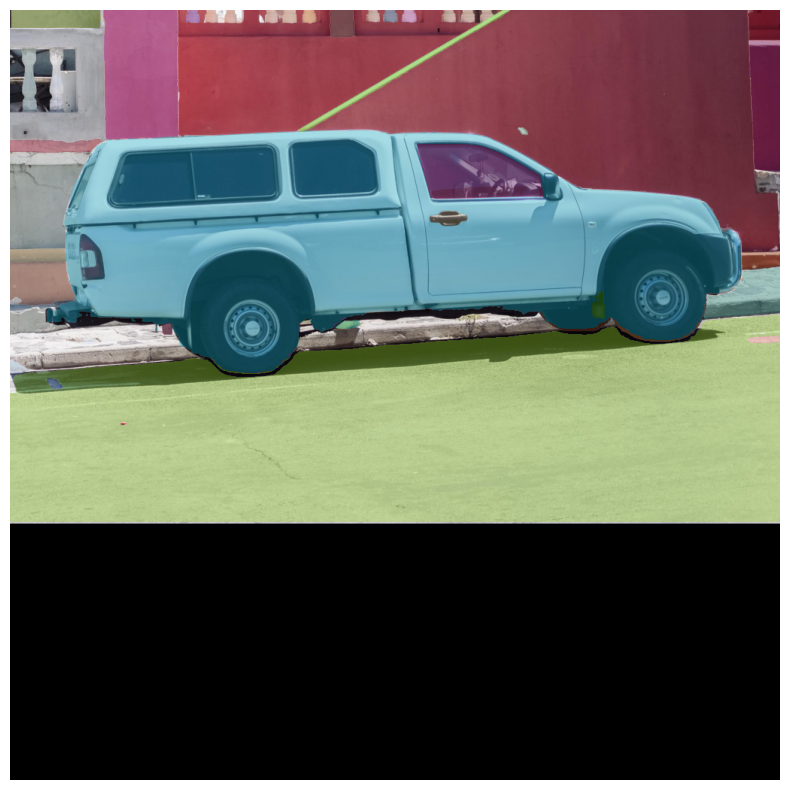

In [25]:
demo_utils.plot_all_masks(input_image[0], ret, figsize=10)

In [26]:
input_image[0].shape

(1024, 1024, 3)

# Another sample

In [29]:
image_path = '/content/scenic/sample_images/groceries.jpg'

In [30]:
image = demo_utils.load_image(image_path)

In [31]:
input_image, padding_mask, ori_size = demo_utils.resize_and_pad_image(
    image, target_size=input_size)

In [32]:
ret = sam_model.apply(
    {'params': params},
    image=input_image[0],
    padding_mask=padding_mask[0],
    method=sam_model.generate)

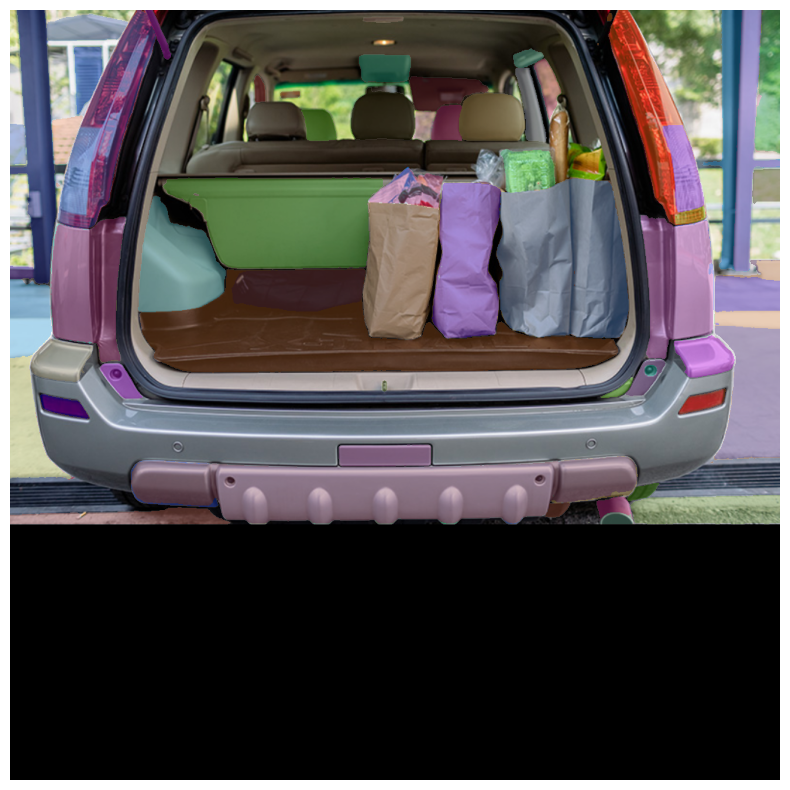

In [33]:
demo_utils.plot_all_masks(input_image[0], ret, figsize=10)